#  Q1 (Airlines)

Hierarchical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
data=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
def norm_func(i):
    x=(i-i.mean()/i.std())
    return x

In [5]:
datas=(data.iloc[:,1:])
datas

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
datas_norm=pd.DataFrame(normalize(datas),columns=datas.columns)
datas_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [7]:
import scipy.cluster.hierarchy as sch

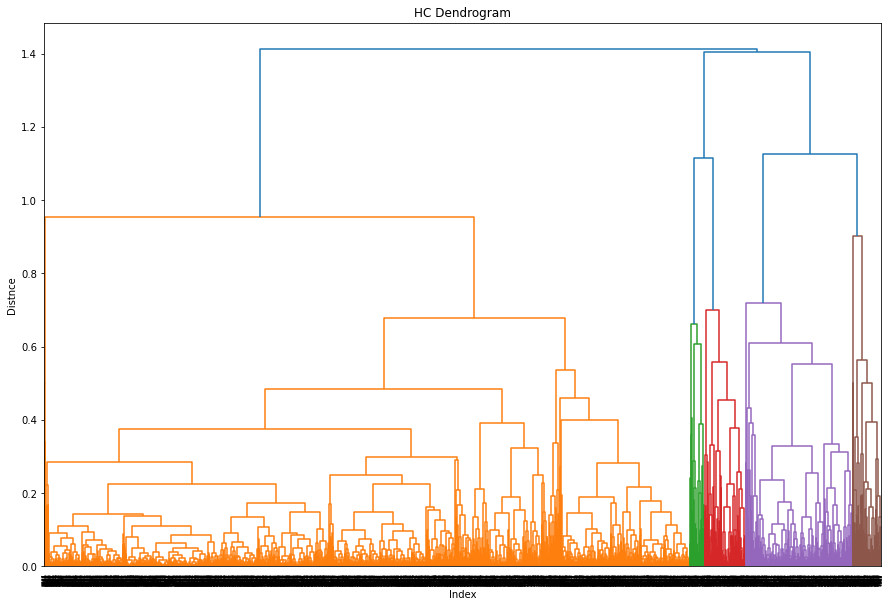

In [8]:
plt.figure(figsize=(15,10));plt.title('HC Dendrogram');plt.xlabel('Index');plt.ylabel('Distnce')
dendograms=sch.dendrogram(sch.linkage(datas_norm,'complete'))
plt.show()

In [9]:
hcomplete=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean').fit(datas_norm)
hcomplete

AgglomerativeClustering(n_clusters=3)

In [10]:
cluster_labels=pd.DataFrame(hcomplete.fit_predict(datas_norm),columns=['h_cluster'])
cluster_labels['h_cluster'].value_counts()

1    2738
0    1032
2     229
Name: h_cluster, dtype: int64

In [11]:
datas['h_cluster']=hcomplete.labels_
datas

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


### K_means

In [12]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [13]:
model=KMeans(n_clusters=5)
model.fit(datas_norm)

KMeans(n_clusters=5)

In [14]:
model.labels_

array([3, 4, 3, ..., 1, 3, 4])

In [15]:
md=pd.Series(model.labels_)
datas['clust']=md
datas_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [16]:
datas.iloc[:,:11].groupby(datas.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225
1,70702.938431,116.006951,3.133069,1.025819,1.019861,32507.124131,17.612711,442.416087,1.310824,4042.825223,0.490566
2,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841,0.903409
3,97435.764129,185.586175,1.604858,1.009341,1.001868,9637.081738,9.706679,520.642690,1.566091,3961.922466,0.269500
4,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680


In [17]:
datas

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1,3
1,19244,0,1,1,1,215,2,0,0,6968,0,1,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,3
3,14776,0,1,1,1,500,1,0,0,6952,0,1,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,3
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,3


In [18]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(datas_norm)
    wcss.append(kmeans.inertia_)

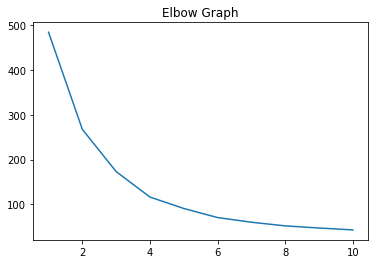

In [19]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.show()

### DBSCAN 

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler as mms

In [21]:
scaled=mms()

In [22]:
df=datas.iloc[:,:11]
df.values

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [23]:
scaler1_df = scaled.fit_transform(data)
print(scaler1_df)

[[0.00000000e+00 1.65077268e-02 0.00000000e+00 ... 0.00000000e+00
  8.43742464e-01 0.00000000e+00]
 [2.48756219e-04 1.12878760e-02 0.00000000e+00 ... 0.00000000e+00
  8.39884254e-01 0.00000000e+00]
 [4.97512438e-04 2.42568502e-02 0.00000000e+00 ... 0.00000000e+00
  8.47841813e-01 0.00000000e+00]
 ...
 [9.99502488e-01 4.31694976e-02 0.00000000e+00 ... 0.00000000e+00
  1.68796721e-01 1.00000000e+00]
 [9.99751244e-01 3.22018866e-02 0.00000000e+00 ... 1.88679245e-02
  1.68676151e-01 0.00000000e+00]
 [1.00000000e+00 1.76908304e-03 0.00000000e+00 ... 0.00000000e+00
  1.68314444e-01 0.00000000e+00]]


In [24]:
dbscan=DBSCAN(eps=1,min_samples=12)
dbscan

DBSCAN(eps=1, min_samples=12)

In [54]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['dbscan_cluster'])
y['dbscan_cluster'].value_counts()

0    2518
1    1481
Name: dbscan_cluster, dtype: int64

In [55]:
# silhouette score
sil_score= silhouette_score(scaler1_df,dbscan.labels_)
sil_score

0.4701970394742716

In [56]:
pd.concat([datas,y],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster,clust,dbscan_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1,3,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,4,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,3,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,4,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,3,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,3,0


#  Q2 (crime_data)

Hierarchical

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [29]:
cdata=pd.read_csv('crime_data.csv')
cdata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6
5,5,7.9,204,78,38.7
6,6,3.3,110,77,11.1
7,7,5.9,238,72,15.8
8,8,15.4,335,80,31.9
9,9,17.4,211,60,25.8


In [30]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int64  
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 2.1 KB


In [31]:
def norm_func(i):
    x=(i-i.mean()/i.std())
    return x

In [32]:
df_norm=norm_func(cdata.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,11.41192,233.950986,53.472119,18.93317
1,8.21192,260.950986,43.472119,42.23317
2,6.31192,291.950986,75.472119,28.73317
3,7.01192,187.950986,45.472119,17.23317
4,7.21192,273.950986,86.472119,38.33317
5,6.11192,201.950986,73.472119,36.43317
6,1.51192,107.950986,72.472119,8.83317
7,4.11192,235.950986,67.472119,13.53317
8,13.61192,332.950986,75.472119,29.63317
9,15.61192,208.950986,55.472119,23.53317


In [33]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
type(df_norm)

pandas.core.frame.DataFrame

In [34]:
z=linkage(df_norm, method="complete", metric="euclidean")
z

array([[ 14.        ,  28.        ,   2.29128785,   2.        ],
       [ 16.        ,  25.        ,   3.8340579 ,   2.        ],
       [ 13.        ,  15.        ,   3.92937654,   2.        ],
       [ 12.        ,  31.        ,   6.23698645,   2.        ],
       [ 34.        ,  43.        ,   6.63777071,   2.        ],
       [ 35.        ,  45.        ,   7.35527022,   2.        ],
       [  6.        ,  37.        ,   8.0274529 ,   2.        ],
       [ 18.        ,  40.        ,   8.53756406,   2.        ],
       [ 48.        ,  50.        ,  10.86001842,   3.        ],
       [ 20.        ,  29.        ,  11.45643924,   2.        ],
       [ 36.        ,  55.        ,  12.42497485,   3.        ],
       [  3.        ,  41.        ,  12.61427762,   2.        ],
       [ 47.        ,  57.        ,  12.77536692,   3.        ],
       [ 33.        ,  44.        ,  13.04492238,   2.        ],
       [ 21.        ,  27.        ,  13.29736816,   2.        ],
       [ 26.        ,  51

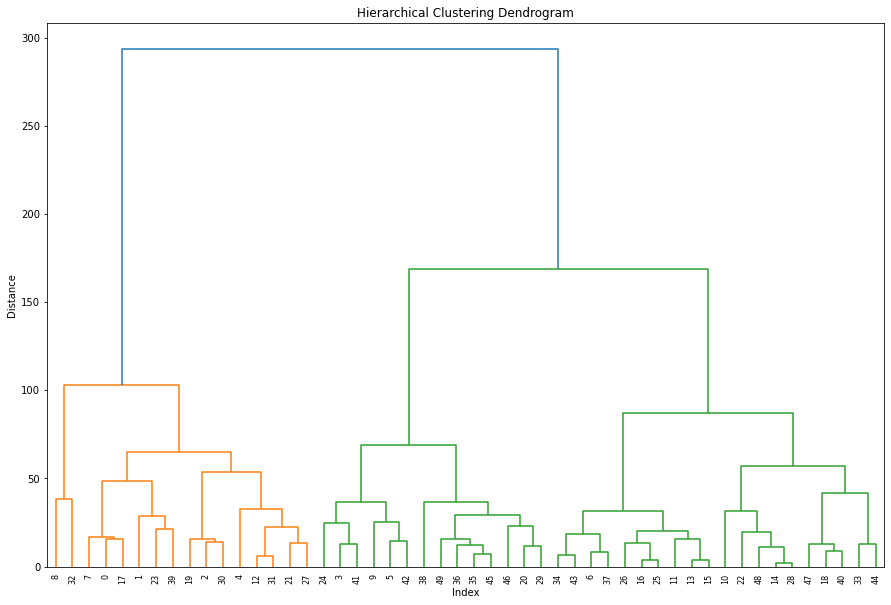

In [35]:
plt.figure(figsize=(15,10));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [36]:
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(df_norm)
h_complete

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [37]:
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0     0
1     0
2     0
3     2
4     0
5     2
6     1
7     0
8     0
9     2
10    1
11    1
12    0
13    1
14    1
15    1
16    1
17    0
18    1
19    0
20    2
21    0
22    1
23    0
24    2
25    1
26    1
27    0
28    1
29    2
30    0
31    0
32    0
33    1
34    1
35    2
36    2
37    1
38    2
39    0
40    1
41    2
42    2
43    1
44    1
45    2
46    2
47    1
48    1
49    2
dtype: int64

In [38]:
cdata['h_clusterid']=cluster_labels
cdata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0,13.2,236,58,21.2,0
1,1,10.0,263,48,44.5,0
2,2,8.1,294,80,31.0,0
3,3,8.8,190,50,19.5,2
4,4,9.0,276,91,40.6,0
5,5,7.9,204,78,38.7,2
6,6,3.3,110,77,11.1,1
7,7,5.9,238,72,15.8,0
8,8,15.4,335,80,31.9,0
9,9,17.4,211,60,25.8,2


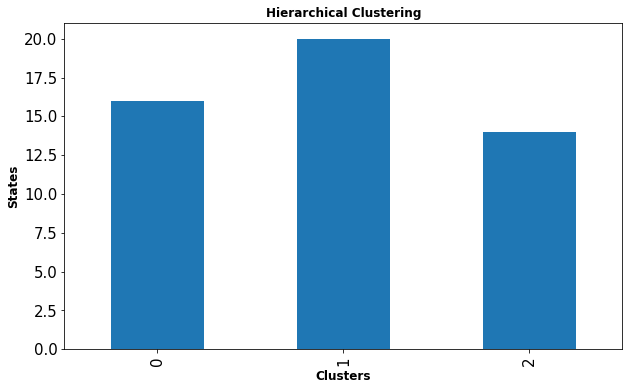

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
cdata.groupby(['h_clusterid']).count()['Unnamed: 0'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### K_mean

In [63]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [64]:
model=KMeans(n_clusters=5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [65]:
model.labels_

array([1, 1, 4, 3, 1, 3, 0, 1, 4, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 4, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 4, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3])

In [66]:
md=pd.Series(model.labels_)
cdata['clust']=md
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,11.41192,233.950986,53.472119,18.93317
1,8.21192,260.950986,43.472119,42.23317
2,6.31192,291.950986,75.472119,28.73317
3,7.01192,187.950986,45.472119,17.23317
4,7.21192,273.950986,86.472119,38.33317


In [67]:
cdata.iloc[:,1:5].groupby(cdata.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,5.590000,112.400000,65.600000,17.270000
1,11.766667,257.916667,68.416667,28.933333
2,2.950000,62.700000,53.900000,11.510000
3,8.214286,173.285714,70.642857,22.842857
4,11.950000,316.500000,68.000000,26.700000


In [68]:
cdata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clust
0,0,13.2,236,58,21.2,0,1
1,1,10.0,263,48,44.5,0,1
2,2,8.1,294,80,31.0,0,4
3,3,8.8,190,50,19.5,2,3
4,4,9.0,276,91,40.6,0,1
5,5,7.9,204,78,38.7,2,3
6,6,3.3,110,77,11.1,1,0
7,7,5.9,238,72,15.8,0,1
8,8,15.4,335,80,31.9,0,4
9,9,17.4,211,60,25.8,2,3


In [69]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


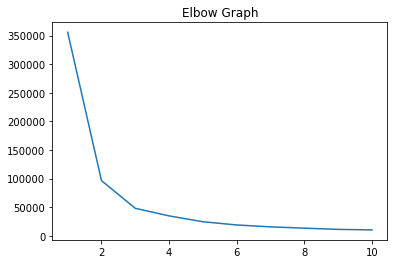

In [70]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.show()

### DBSCAN

In [71]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [72]:
df=cdata.iloc[:,1:5]
df.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [73]:
stscaler=StandardScaler().fit(df.values)
X=stscaler.transform(df.values)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [74]:
dbscan=DBSCAN(eps=0.8,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.8)

In [75]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [76]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [77]:
pd.concat([cdata,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clust,cluster
0,0,13.2,236,58,21.2,0,1,-1
1,1,10.0,263,48,44.5,0,1,-1
2,2,8.1,294,80,31.0,0,4,-1
3,3,8.8,190,50,19.5,2,3,-1
4,4,9.0,276,91,40.6,0,1,-1
5,5,7.9,204,78,38.7,2,3,-1
6,6,3.3,110,77,11.1,1,0,-1
7,7,5.9,238,72,15.8,0,1,-1
8,8,15.4,335,80,31.9,0,4,-1
9,9,17.4,211,60,25.8,2,3,-1
